# NYC Flights 2013 - Asking the right Questions


In this short project, I will perform basic exploratory analysis on an example dataset, bringing to bear all of my new skills in data manipulation and visualization.
This data set uses the NYCFlights13 dataset. (https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf) 

In [1]:
import IPython
print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__


IPython version:       4.0.1 (need at least 1.0)
Numpy version:        1.10.1 (need at least 1.7.1)
SciPy version:        0.16.0 (need at least 0.12.0)
Pandas version:       0.17.1 (need at least 0.11.0)
Mapltolib version:     1.5.0 (need at least 1.2.1)
Scikit-Learn version:   0.17 (need at least 0.13.1)


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pylab import *
from scipy import *
from pylab import rcParams
import statsmodels.formula.api as smf
%matplotlib inline

In [33]:
flights_df = pd.read_csv('flights.csv')

In [34]:
print flights_df.shape
print flights_df.columns
print flights_df.dtypes

(336776, 17)
Index([u'Unnamed: 0', u'year', u'month', u'day', u'dep_time', u'dep_delay',
       u'arr_time', u'arr_delay', u'carrier', u'tailnum', u'flight', u'origin',
       u'dest', u'air_time', u'distance', u'hour', u'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [35]:
flights_df.dest.unique()
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
1,2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
2,3,2013,1,1,542,2,923,33,AA,N619AA,1141,JFK,MIA,160,1089,5,42
3,4,2013,1,1,544,-1,1004,-18,B6,N804JB,725,JFK,BQN,183,1576,5,44
4,5,2013,1,1,554,-6,812,-25,DL,N668DN,461,LGA,ATL,116,762,5,54
5,6,2013,1,1,554,-4,740,12,UA,N39463,1696,EWR,ORD,150,719,5,54
6,7,2013,1,1,555,-5,913,19,B6,N516JB,507,EWR,FLL,158,1065,5,55
7,8,2013,1,1,557,-3,709,-14,EV,N829AS,5708,LGA,IAD,53,229,5,57
8,9,2013,1,1,557,-3,838,-8,B6,N593JB,79,JFK,MCO,140,944,5,57
9,10,2013,1,1,558,-2,753,8,AA,N3ALAA,301,LGA,ORD,138,733,5,58


Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following some questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [36]:
flights_df = pd.DataFrame(flights_df)
# NYC Airports are JFK, EWR and LGA 
# subsetting the flights from these airports to Seattle (SEA)
sea_flights = flights_df[((flights_df.origin == 'JFK') | (flights_df.origin == 'EWR') 
                | (flights_df.origin == 'LGA')) & (flights_df.dest == 'SEA')]
len(sea_flights)

3923

- There were 3923 flights that flew from NYC airports (JFK, EWR, LGA) to Seattle in 2013. 

(b) How many airlines fly from NYC to Seattle?

In [37]:
len(sea_flights.carrier.unique())

5

- There are 5 airlines that fly from NYC to Seattle based on our data

(c) How many unique air planes fly from NYC to Seattle?

In [38]:
# Every plane would have a unique tail number
len(sea_flights.tailnum.unique()) # Calculating number of unique air planes

936

- There were 936 unique airplanes operating between NYC and Seattle in 2013.

(d) What is the average arrival delay for flights from NC to Seattle?

In [39]:
sea_flights.arr_delay.mean() # mean arrival delay

-1.0990990990990992

- The average arrival delay for flights from NYC to Seattle in 2013 was -1.099 mins, ie, on an average the flights from NYC to Seattle arrived 1.099 mins before their scheduled arrival time. 

(e) What proportion of flights to Seattle come from each NYC airport?

In [40]:
# Creating new data frame with number of flights grouped by NYC airport
prop = pd.DataFrame(sea_flights.groupby('origin')['origin'].count()) 
prop.columns = ['count'] # Renaming column name to count of flights
sum = prop.sum() # Total number of flights
prop['proportion'] = prop.apply(lambda count: 100*count/float(count.sum())) # percentage flights / total
prop

,count,proportion
origin,,
EWR,1831,46.673464
JFK,2092,53.326536


-------------------------------------------------------------------------------------------------
In 2013, the flights from NYC airports to Seattle were split as follows:
1. 46.67% from the EWR airport (Newark Liberty International Airport) 
2. 53.32% from the JFK airport (John F. Kennedy International Airport)
3. 0% from the LGA airport (LaGuardia Airport) 

Flights are often delayed. We consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [41]:
# Adding the Date column by concatenating yyyy-mm-dd
flights_df['date'] = flights_df['year'].astype(str) + "-" + flights_df['month'].astype(str) + "-" + flights_df['day'].astype(str)
# Creating a new dataframe with departure delay averages by date
avg_by_date = pd.DataFrame(flights_df.groupby('date').mean()) # Group by date for mean of all columns

# Finding the date with the maximum average departure delay
print 'The date with largest average departure delay is'
print avg_by_date.sort_values(['dep_delay'], ascending = False)['dep_delay'].head(1)


# Finding the date with the maximum average arrival delay
print '\nThe date with largest average arrival delay is'
print avg_by_date.sort_values(['arr_delay'], ascending = False)['arr_delay'].head(1)


The date with largest average departure delay is
date
2013-3-8    83.536921
Name: dep_delay, dtype: float64

The date with largest average arrival delay is
date
2013-3-8    85.862155
Name: arr_delay, dtype: float64


-------------------------------------------------------------------------------------------------
- The date with Largest average departure delay is 2013-3-8 (8th March, 2013) with an average dep delay of 83.53 mins
- The date with Largest average arrival delay is 2013-3-8 (8th March, 2013) with an average arr delay of 85.86 mins

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [42]:
# 1. Largest average departure delay in a day.
# Finding the date with the maximum average departure delay
print 'The date with largest average departure delay is:'
print avg_by_date.sort_values(['dep_delay'], ascending = False)['dep_delay'].head(1)

# 2. Most number of delayed flights in a day.
# Subsetting data to find only flights in a day that are delayed (ie. Dep_delay > 0 mins)
dep_delay = flights_df[flights_df['dep_delay'] > 0]
dep_delay_agg = pd.DataFrame(dep_delay.groupby('date').count())
dep_delay_agg.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
print '\nMost number of delayed flights in a day:'
print dep_delay_agg.sort_values(['count'], ascending = False)['count'].head(1)

# 3. Highest departure delay of a flight in a day. 
dep_delay = dep_delay.set_index(['date'])
print "\nHighest delay in the departure of a flight (in mins) was on:"
print dep_delay.sort_values(['dep_delay'], ascending = False)['dep_delay'].head(1)

# 4. Highest % of flights delayed in a given day.
flights_grouped = flights_df.groupby('date').count()
flights_grouped.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
print "\nHighest % of flights delayed in a given day was on:"
print (dep_delay_agg['count'] / flights_grouped['count'] * 100).sort_values(ascending = False).head(1)

The date with largest average departure delay is:
date
2013-3-8    83.536921
Name: dep_delay, dtype: float64

Most number of delayed flights in a day:
date
2013-12-23    674
Name: count, dtype: int64

Highest delay in the departure of a flight (in mins) was on:
date
2013-1-9    1301
Name: dep_delay, dtype: float64

Highest % of flights delayed in a given day was on:
date
2013-12-23    68.426396
Name: count, dtype: float64


-------------------------------------------------------------------------------------------------
So this is a tricky one -- disliking delayed flights and the worst day to fly out can be a little subjective, and interpretted in different ways. 
For instance:
1. Largest average departure delay. 
2. Most number of delayed flights in a day. 
3. Highest departure delay in a day.
4. Highest % of flights delayed in a given day. 

So let's look at all of them. 

- If a person dislikes delayed flights based on largest average departure delays then the worst day to fly out of NYC in 2013 was <b>2013-3-8</b> with the average delay in depature time of <b>83.53 mins</b> for all flights put together.

- If a person dislikes delayed flights such that there were most number of delayed flights in a given day then the worst day to fly out of NYC in 2013 was <b>2013-12-23</b> which featured <b>674 delayed flights in a single day</b>. 

- If a person dislikes delayed flights such that a flight had the highest value in mins for its delay then the worst day to fly out would be <b>2013-1-9</b> since the person could get on a flight that was <b>delayed by 1301 minutes (~21 hours).</b>

- If a person dislikes delayed flights given the highest percentage of flights delayed in a given day of the total flights departed, the worst day to fly out would be <b>2013-12-23 as 68.43% of flights that flew that day were delayed</b>. 


(c) Are there any seasonal patterns in departure delays for flights from NYC?

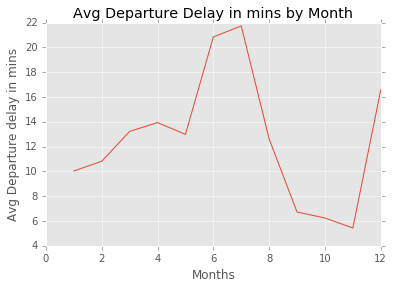

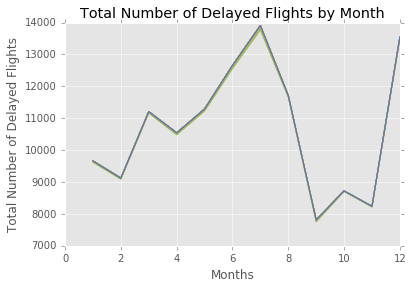

In [43]:
# Exploring the seasonal patterns in average departure delay in mins by Month
flights_df.head()
matplotlib.style.use('ggplot') 
plt.plot(flights_df.groupby('month')['dep_delay'].mean())
plt.xlabel('Months', size = 12)
plt.ylabel('Avg Departure delay in mins', size = 12)
plt.title('Avg Departure Delay in mins by Month')
plt.show()

# Exploring the seasonal patterns in total number of delayed by Month
plt.plot(dep_delay.groupby('month').count())
plt.xlabel('Months', size = 12)
plt.ylabel('Total Number of Delayed Flights', size = 12)
plt.title('Total Number of Delayed Flights by Month')
plt.show()

-------------------------------------------------------------------------------------------------
- Yes, there seem to be some evident patterns in the flight departure delays. Mostly, the holiday season shows spike in the mean flight departure delay time during the months of June, July and December. These months have the highest average of delayed mins. Also, the second graph shows the total number of flights delayed in a given month and again July and December seem to stand out with most number of delayed flights in total. This ties back directly to the Summer and winter break that post people take during these months of the year in terms of season.

(d) On average, how do departure delays vary over the course of a day?

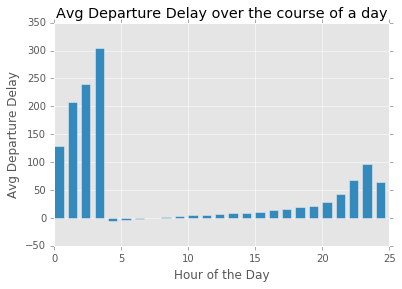

Number of flights by hour of the day:
0       881
1       223
2        64
3        11
4       305
5      7246
6     22699
7     21461
8     26424
9     18871
10    16076
11    16762
12    16071
13    16890
14    20480
15    22840
16    22336
17    22144
18    21549
19    19940
20    16160
21    10960
22     5483
23     2616
24       29
Name: count, dtype: int64


In [44]:
# Exploring data for departure delay trends over the course of a day
dep_delay_hour = pd.DataFrame(flights_df.groupby('hour')['dep_delay'].mean()) # Group by hour
dep_delay_hour.index.name = None

# Plotting Data
fig, ax = plt.subplots()
plt.bar(range(25), dep_delay_hour.dep_delay, 0.70)
plt.xlabel('Hour of the Day', size = 12)
plt.ylabel('Avg Departure Delay', size = 12)
plt.title('Avg Departure Delay over the course of a day')
plt.show()

# Calculating the number of flights by hour of the day
count_flights_hour = flights_df.groupby('hour').count()
count_flights_hour.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
count_flights_hour.index.name = None
print 'Number of flights by hour of the day:\n', count_flights_hour['count']


-------------------------------------------------------------------------------------------------
- From the plot it is clear that the delays are more prominent during the night mainly between 10 PM and 4 AM (with a peak in the 3rd hour of the day). A possible reason for this could be low visibility condition during these hours or other factors like fog or bad weather conditions. The delay in flight departures go down significantly in other hours of the day. 
- Also, another point to note is that the number of flights in these late hours are fewer than others -- this is one possible reason why the average of the departure delay times is higher during 10 PM - 4 AM (fewer flights and most flights delayed: Example: Only 11 flights around 3 AM).

Which flight departing NYC in 2013 flew the fastest?

In [45]:
# Assuming the degree of fastness corresponds to the speed of the flight. 
flights_df['speed_in_mph'] = flights_df.distance/(flights_df.air_time/60)
x = ['date','carrier','tailnum','flight','origin','dest','air_time','distance','speed_in_mph']
flights_df.sort_values('speed_in_mph',ascending = False)[x].head(1)


,date,carrier,tailnum,flight,origin,dest,air_time,distance,speed_in_mph
216447,2013-5-25,DL,N666DN,1499,LGA,ATL,65,762,703.384615


-------------------------------------------------------------------------------------------------
- Flight 1499 with Tail number N666DN traveling between La Guardia Airport (LGA) in NYC to Hartsfield–Jackson Atlanta International Airport was the fastest in terms of speed in miles per hour. 
- The flight covered the distance of 762 miles in 65 mins with an average speed of 703.38 miles per hour.

Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [46]:
# Concatenating the flight details together as carrier + flight + dest for our analysis
flights_df['flight_combo'] = flights_df['carrier'].astype(str) + ' ' + flights_df['flight'].astype(str) + ' ' + flights_df['dest'].astype(str)
flights_df.head()

# Just checking the dates that are present in the dataset and getting a count
dates = pd.DataFrame(flights_df.date.unique())
dates.rename(columns={0:'date'}, inplace = True)
print "\nFor a flight to fly every day, it needs to fly these number of days: ", dates.date.count()

# Grouping by flight and date to see which flights fly on which days of the year
flights_rep = flights_df.groupby(['flight_combo','date']).count()
flights_rep.reset_index(level=0, inplace=True) # getting rid of the flight_combo index from the dataframe
flights_rep.reset_index(level=0, inplace=True) # getting rid of the date index from the dataframe
flights_rep.rename(columns={'Unnamed: 0':'count'}, inplace = True)

# Counting number of days a given flight combo flies
flights_rep = flights_rep.groupby('flight_combo').count().sort_values('count', ascending = False) 
flights_rep.reset_index(level=0, inplace=True)

# Getting only flights that fly on all days (365 unique days of the current dataset)
flights_all_days = flights_rep[flights_rep['count'] == 365]['flight_combo']
print "\nThe flights (i.e. carrier + flight + dest) happen every day are: \n",flights_all_days

# Getting the destinations they fly to
destinations = []
for f in flights_all_days.astype(str):
    destinations.append(f[len(f)-3:])
destinations = set(destinations)
print "\nThe flights that fly every day fly to the following destinations: \n\n", destinations


For a flight to fly every day, it needs to fly these number of days:  365

The flights (i.e. carrier + flight + dest) happen every day are: 
0       UA 15 HNL
1      B6 371 FLL
2      AA 181 LAX
3      B6 219 CLT
4      AA 119 LAX
5      B6 703 SJU
6     DL 2391 TPA
7     AA 1357 SJU
8     EV 5712 IAD
9      VX 251 LAS
10    AA 1611 MIA
11     VX 413 LAX
12    DL 2159 MCO
13     B6 431 SRQ
14     VX 407 LAX
15      AA 59 SFO
16    B6 1783 MCO
17     B6 359 BUR
Name: flight_combo, dtype: object

The flights that fly every day fly to the following destinations: 

set(['MCO', 'TPA', 'MIA', 'IAD', 'HNL', 'SJU', 'SFO', 'SRQ', 'LAX', 'FLL', 'CLT', 'BUR', 'LAS'])


 -------------------------------------------------------------------------------------------------
 
 - We analyse the flights that happen every day by grouping by flight (carrier + flight + dest) by date. 
 
 - The following flights fly every day of the year 2013 from NYC:
     1. UA 15 HNL
     2. B6 371 FLL
     3. AA 181 LAX
     4. B6 219 CLT
     5. AA 119 LAX
     6. B6 703 SJU
     7. DL 2391 TPA
     8. AA 1357 SJU
     9. EV 5712 IAD
     10. VX 251 LAS
     11. AA 1611 MIA
     12. VX 413 LAX
     13. DL 2159 MCO
     14. B6 431 SRQ
     15. VX 407 LAX
     16. AA 59 SFO
     17. B6 1783 MCO
     18. B6 359 BUR

- The flights that fly every day fly to the following destinations:

     1. 'MCO' -- Orlando International Airport (FL)
     2. 'TPA' -- Tampa International Airport (FL)
     3. 'MIA' -- Miami International Airport (FL)
     4. 'IAD' -- Washington Dulles International Airport (VI)
     5. 'HNL' -- Honolulu International Airport
     6. 'SJU' -- San Juan Airport Hotel (Puerto Rico)
     7. 'SFO' -- San Francisco International Airport (CA)
     8. 'SRQ' -- Sarasota–Bradenton International Airport (FL)
     9. 'LAX'-- Los Angeles International Airport (CA)
     10. 'FLL' -- Fort Lauderdale–Hollywood International Airport (FL)
     11. 'CLT' -- Charlotte Douglas International Airport (NC)
     12. 'BUR' -- Bob Hope Airport (CA)
     13. 'LAS' -- McCarran International Airport (CA)
     

- These flights are between NY and the following places: California, Florida, Virginia, North Carolina and Puerto Rico

Developing a Research question from the dataset:


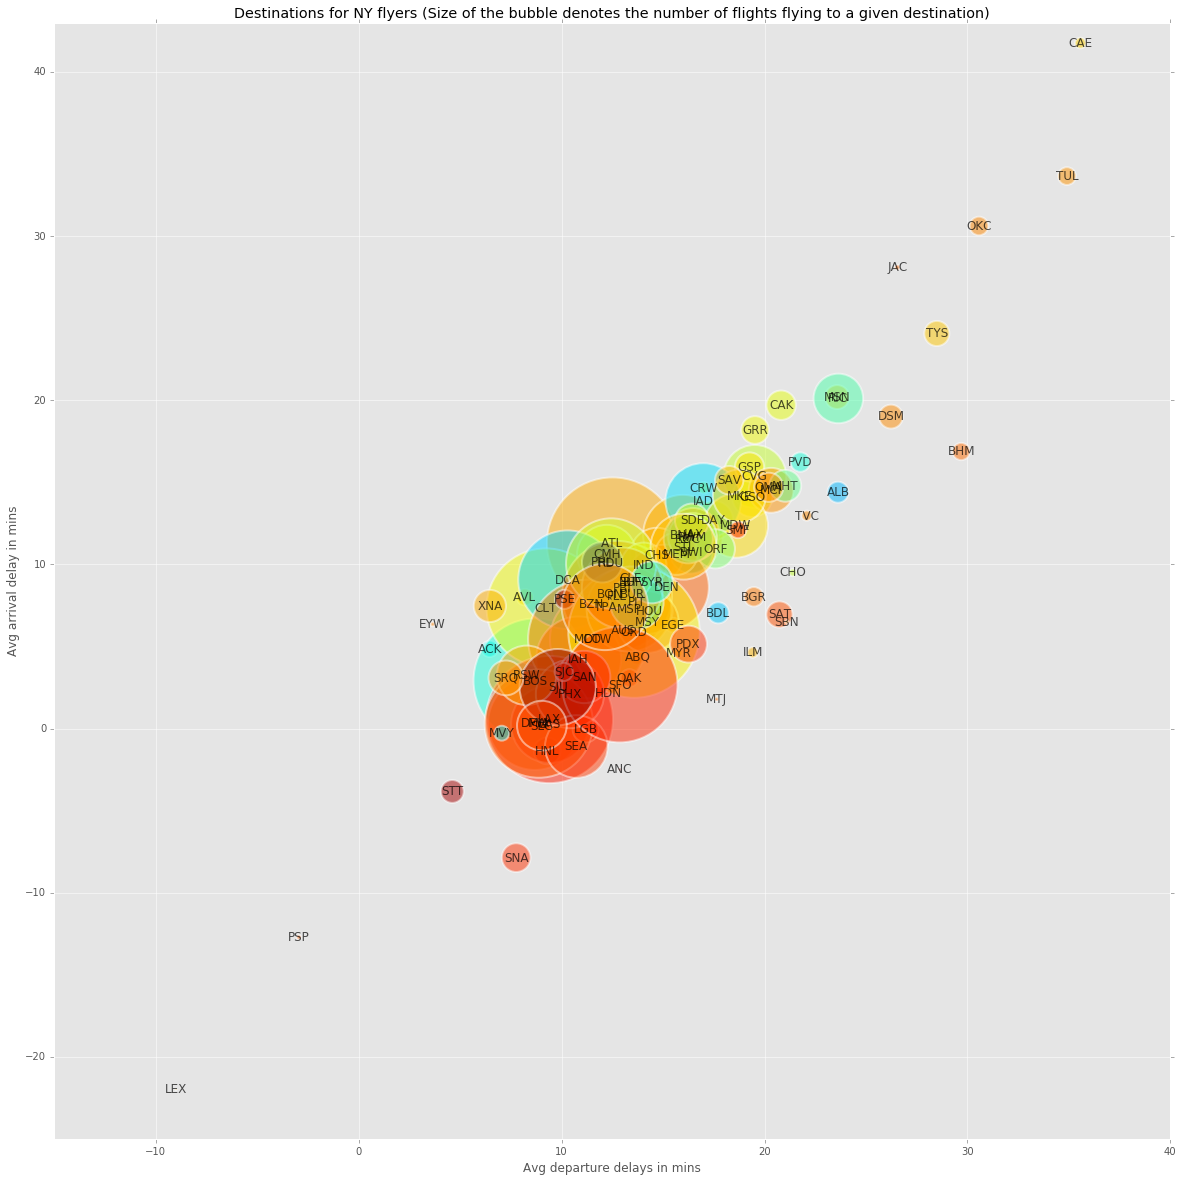

The top 5 destinations to travel to:

   dest  dep_delay  arr_delay  speed_in_mph  total_flights_count
50  LEX  -9.000000 -22.000000    402.666667                    1
77  PSP  -2.944444 -12.722222    429.749501                   19
95  SNA   7.761905  -7.868227    445.110140                  825
98  STT   4.613900  -3.835907    479.149702                  522
3   ANC  12.875000  -2.500000    489.985945                    8


The worst 5 destinations to travel to:

    dest  dep_delay  arr_delay  speed_in_mph  total_flights_count
103  TYS  28.493955  24.069204    394.902170                  631
46   JAC  26.545455  28.095238    426.336973                   25
67   OKC  30.568807  30.619048    415.679642                  346
101  TUL  34.906355  33.659864    412.419982                  315
18   CAE  35.570093  41.764151    391.462917                  116


In [54]:
'''Research Question: In 2013, which airlines and airports were best enablers of positive experience for NY flyers 
                       and how can users make smarter decisions for traveling to specific destinations? '''

### Exploring first part of the research question -- what are the best destinations to fly from NYC

# Finding the destination statistics 
dest_avgs = flights_df.groupby('dest')['dep_delay','arr_delay','speed_in_mph'].mean()
dest_avgs.reset_index(level=0, inplace=True)

# Cleaning up data further
total_flights = flights_df.groupby('dest').count()
total_flights.reset_index(level=0, inplace=True)
total_flights.rename(columns = {'Unnamed: 0':'count'}, inplace = True)
dest_avgs['total_flights_count'] = total_flights['count']
dest_avgs = dest_avgs[np.isfinite(dest_avgs['dep_delay'])]
dest_avgs = dest_avgs[np.isfinite(dest_avgs['arr_delay'])]
dest_avgs = dest_avgs[np.isfinite(dest_avgs['speed_in_mph'])]

rcParams['figure.figsize'] = 20, 20

# Preparing for plotting
x = list(dest_avgs['dep_delay']) # X axis shows the departure delay in mins
y = list(dest_avgs['arr_delay']) # Y axis shows the arrival delay in mins
color = list(dest_avgs['speed_in_mph']) # The color of the bubbles show the speed of the flights
area = list(dest_avgs['total_flights_count']) # The size of the bubbles show the number of flights to that destination
s = list(dest_avgs['dest'])

i = 0
while(i<len(dest_avgs)):
    text(x[i],y[i],s[i],size=12, verticalalignment='center', horizontalalignment='center', color='black', alpha = 0.7)
    i = i+1

sct = scatter(x, y, c=color, s=area, linewidths=2, edgecolor='w')
sct.set_alpha(0.50)

axis([-15,40,-25,43])
xlabel('Avg departure delays in mins')
ylabel('Avg arrival delay in mins')
title('Destinations for NY flyers (Size of the bubble denotes the number of flights flying to a given destination)')

show()

print "The top 5 destinations to travel to:\n\n", dest_avgs.sort_values(['arr_delay','dep_delay']).head(5)
print "\n\nThe worst 5 destinations to travel to:\n\n", dest_avgs.sort_values(['arr_delay','dep_delay']).tail(5)

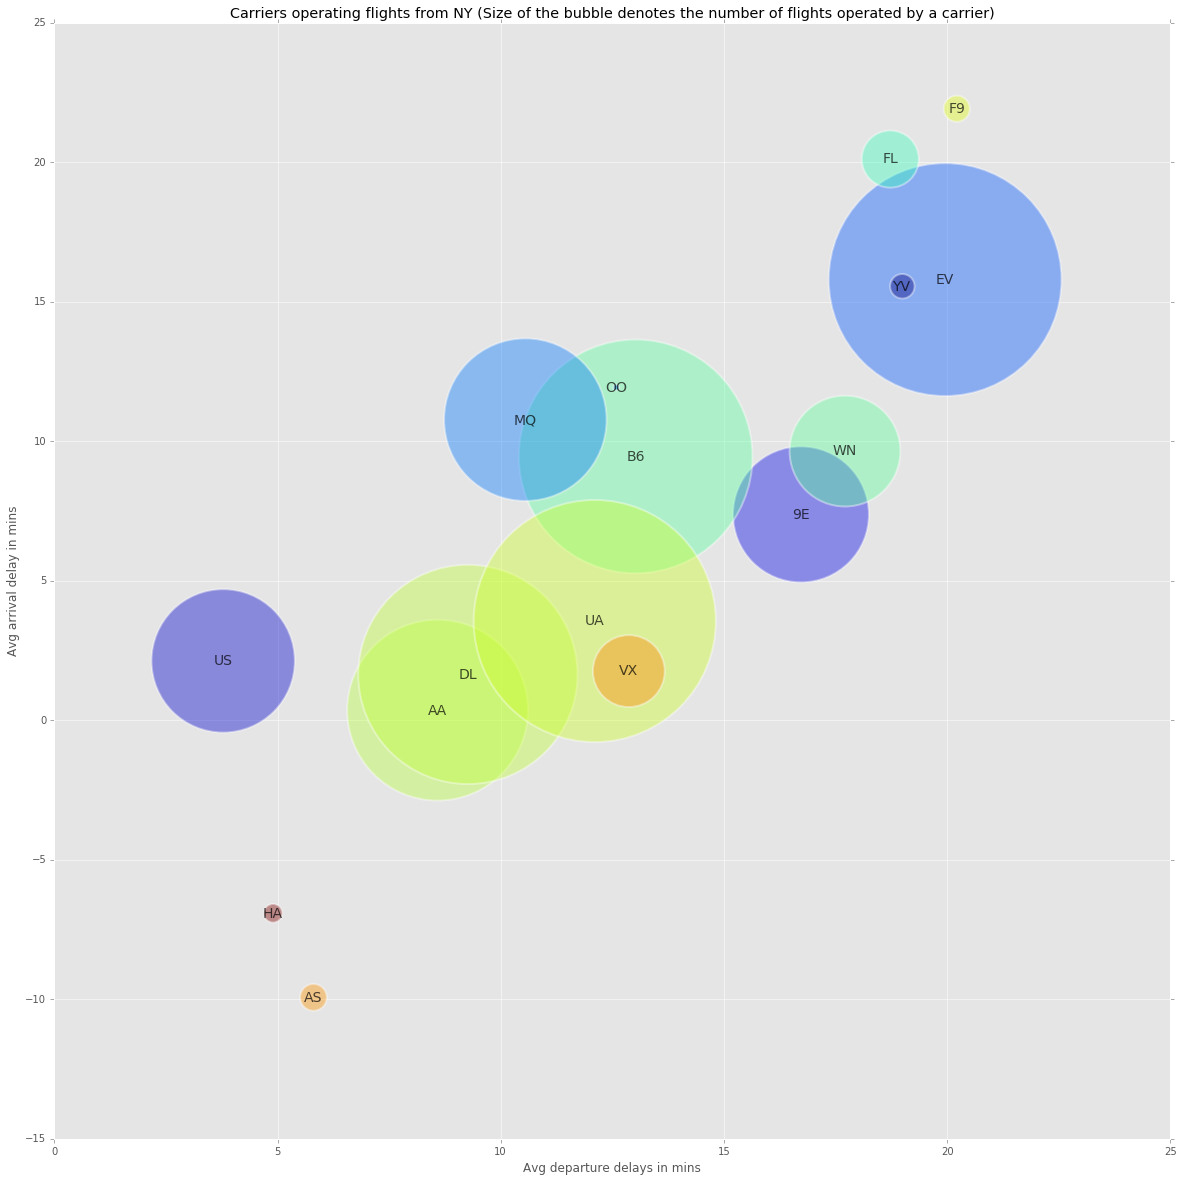

The top 5 carriers to travel with:

   carrier  dep_delay  arr_delay  speed_in_mph  total_flights_count
12      US   3.782418   2.129595    341.939717                20536
8       HA   4.900585  -6.915205    480.357719                  342
2       AS   5.804775  -9.930889    443.678889                  714
1       AA   8.586016   0.364291    417.472739                32729
4       DL   9.264505   1.644341    418.462807                48110


The worst 5 carriers to travel with:

   carrier  dep_delay  arr_delay  speed_in_mph  total_flights_count
14      WN  17.711744   9.649120    400.532009                12275
7       FL  18.726075  20.115906    394.358094                 3260
15      YV  18.996330  15.556985    331.969987                  601
5       EV  19.955390  15.796431    362.943626                54173
6       F9  20.215543  21.920705    425.172111                  685


In [55]:

### Exploring the second part of the research question, what are the best airlines to fly with 

# Finding the destination statistics 
carrier_avgs = flights_df.groupby('carrier')['dep_delay','arr_delay','speed_in_mph'].mean()
carrier_avgs.reset_index(level=0, inplace=True)

# Cleaning up data further
total_flights_ca = flights_df.groupby('carrier').count()
total_flights_ca.reset_index(level=0, inplace=True)
total_flights_ca.rename(columns = {'Unnamed: 0':'count'}, inplace = True)
carrier_avgs['total_flights_count'] = total_flights_ca['count']
carrier_avgs = carrier_avgs[np.isfinite(carrier_avgs['dep_delay'])]
carrier_avgs = carrier_avgs[np.isfinite(carrier_avgs['arr_delay'])]
carrier_avgs = carrier_avgs[np.isfinite(carrier_avgs['speed_in_mph'])]


# Preparing for plotting
x2 = list(carrier_avgs['dep_delay']) # X axis shows the departure delay in mins
y2 = list(carrier_avgs['arr_delay']) # Y axis shows the arrival delay in mins
color2 = list(carrier_avgs['speed_in_mph']) # The color of the bubbles show the speed of the flights
area2 = list(carrier_avgs['total_flights_count']) # The size of the bubbles show the number of flights to that destination
s2 = list(carrier_avgs['carrier'])

i = 0
while(i<len(carrier_avgs)):
    text(x2[i],y2[i],s2[i],size=14, verticalalignment='center', horizontalalignment='center', color='black', alpha = 0.7)
    i = i+1

sct2 = scatter(x2, y2, c=color2, s=area2, linewidths=2, edgecolor='w')
sct2.set_alpha(0.4)
rcParams['figure.figsize'] = 20, 20

axis([0,25,-15,25])
xlabel('Avg departure delays in mins')
ylabel('Avg arrival delay in mins')
title('Carriers operating flights from NY (Size of the bubble denotes the number of flights operated by a carrier)')

show()

print "The top 5 carriers to travel with:\n\n", carrier_avgs.sort_values(['dep_delay','arr_delay']).head(5)
print "\n\nThe worst 5 carriers to travel with:\n\n", carrier_avgs.sort_values(['dep_delay','arr_delay']).tail(5)

In [49]:
flights_df['avg_time_lost'] = flights_df['arr_delay']+flights_df['dep_delay']
best_combination = pd.DataFrame(flights_df.groupby(['dest','carrier'])['avg_time_lost'].mean())
best_combination.reset_index(level=0, inplace=True)
best_combination.reset_index(level=0, inplace=True)
best_combination = best_combination.sort_values('avg_time_lost')
best_combination.rename(columns = {'carrier':'best_carrier'}, inplace = True)
print "For flying to the specific destination from NY, its in the best interest of the user to select the right carrier!\n"
print "The least time lost (departure delay + arrival delay) ensures the user has best experience with a specific carrier to a specific destination. \n "
print "The table below shows users the best airline to pick while traveling to the one of the 105 destinations from NY:\n\n"
print best_combination.drop_duplicates(subset='dest', keep='first')


For flying to the specific destination from NY, its in the best interest of the user to select the right carrier!

The least time lost (departure delay + arrival delay) ensures the user has best experience with a specific carrier to a specific destination. 
 
The table below shows users the best airline to pick while traveling to the one of the 105 destinations from NY:


    best_carrier dest  avg_time_lost
126           UA  IAD     -34.000000
152           9E  LEX     -31.000000
25            DL  BNA     -31.000000
132           DL  IND     -29.000000
295           DL  STT     -25.206897
304           EV  TPA     -23.000000
94            EV  DFW     -19.000000
197           UA  OMA     -19.000000
58            UA  CHS     -19.000000
166           9E  MHT     -18.900000
220           YV  PHL     -16.875000
233           VX  PSP     -15.666667
17            9E  AVL     -14.700000
43            DL  BUF     -14.000000
82            DL  DCA     -12.500000
182           UA  MSP     -11.500

---------------------
Research Question: 

"In 2013, which airlines and airports were best enablers of positive experience for NY flyers and how can users make smarter decisions for better traveling experiences in the future?"


Positive experience depends on various factors but from the dataset we explore the following paramters to define a user's experience with an airline or an airport - depature delays, arrival delays, covering more distance in less time (higher speed), etc.

    1. Best Airports for NY Flyers: The first plot shows the best destinations to travel to from NY based on the delays in arrival, depature and also the number of flights operating. 
    Inferences from the graph are as follows:
        - The top 5 destinations to travel to: LEX, PSP, SNA, STT, ANC
        - The worst 5 destinations to travel to: TYS, JAC, OKC, TUL, CAE
    
    2. Best Carriers overall: The second plot shows the carriers that operate flights from NY to different destinations. We look at aggregate data to see which carriers have the best performance in the least departure delays, least arrival delays and also the avg speed and the total number of flights. Inferences from the graph:
        - The top 5 carriers to fly with: US, HA, AS, AA, DL
        - The worst carriers to fly with: WN, FL, YV, EV, F9
        
    3. We also look at the best carrier to choose when flying to any one of the "specific" 105 destinations. This way, the user can smartly pick one of the 15 carriers while traveling to a given destination of their choice provided it has the least time lost (the sum of avg arrival delay and avg departure delay for that specific destination). The data is shown above.
    
Important Note: The limitation of this research is that we assume that the positive experience of the flyer only depends on arrival and departure delays, while there might be a lot of other factors to define customer experience when flying with an airline to a specific destination.


What weather conditions are associated with flight delays leaving NYC? We use graphics to explore.

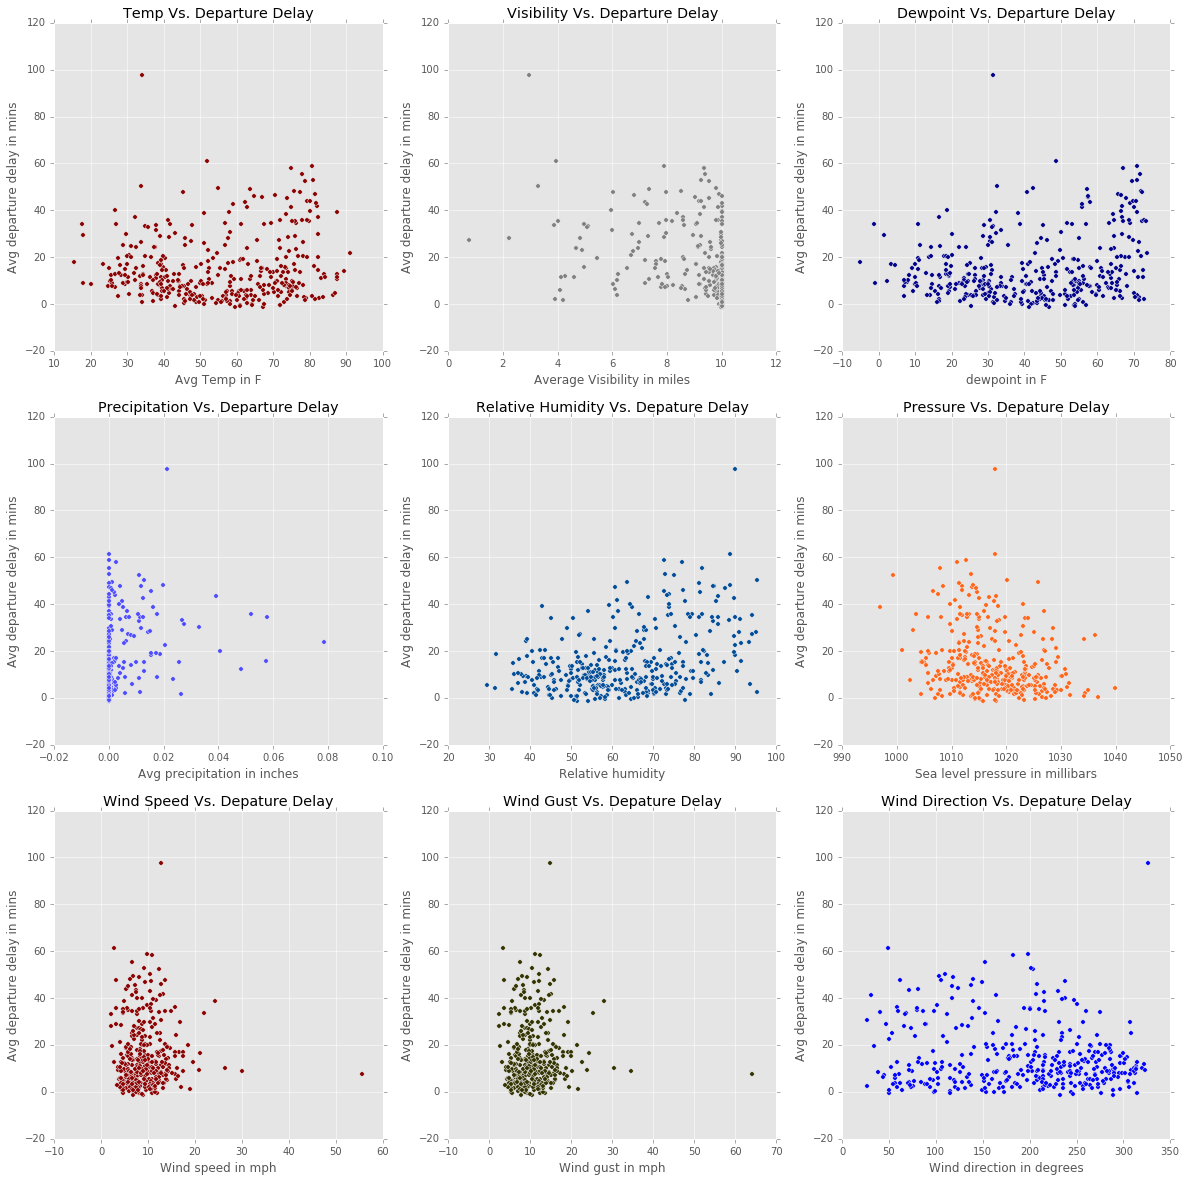

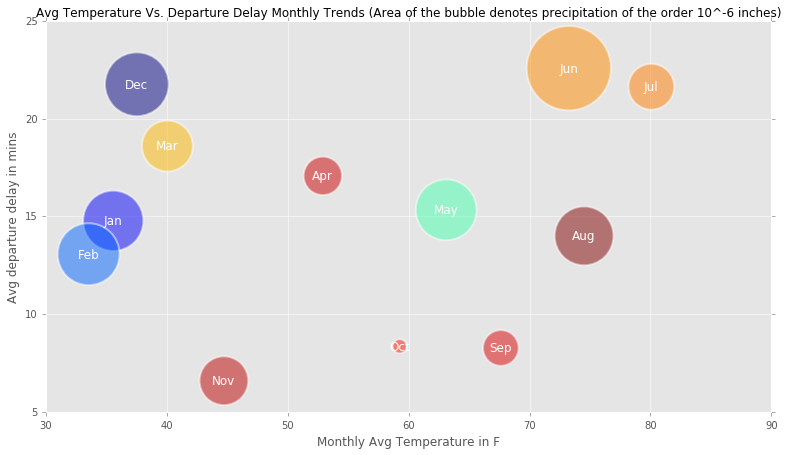


 -------------------------------------- 

The regression coefficients for the dep_delay~temp model (Graph 1) are:

Intercept    10.720439
temp          0.080707
dtype: float64


The regression coefficients for the dep_delay~visib model (Graph 2) are:

Intercept    46.574289
visib        -3.409740
dtype: float64


The regression coefficients for the dep_delay~dewp model (Graph 3) are:

Intercept    8.632177
dewp         0.157130
dtype: float64


The regression coefficients for the dep_delay~precip model (Graph 4) are:

Intercept     13.865579
precip       447.586244
dtype: float64


The regression coefficients for the dep_delay~humid model (Graph 5) are:

Intercept   -9.157928
humid        0.387205
dtype: float64


The regression coefficients for the dep_delay~pressure model (Graph 6) are:

Intercept    520.109715
pressure      -0.496313
dtype: float64


The regression coefficients for the dep_delay~wind_speed model (Graph 7) are:

Intercept     14.876774
wind_speed     0.033627
dtype:

In [50]:
weather_df = pd.read_csv('weather.csv') # Importing the weather dataset 

weather_df = pd.DataFrame(weather_df.groupby(['year','month','day','origin']).mean()) # Aggragating data 
weather_df.reset_index(level = 0, inplace = True) # Getting rid of the grouped indices
weather_df.reset_index(level = 0, inplace = True)
weather_df.reset_index(level = 0, inplace = True)
weather_df.reset_index(level = 0, inplace = True)

# retaining only useful columns
weather_df =  pd.DataFrame(weather_df[['origin','year','month','day','temp','dewp','humid','wind_dir',
                                       'wind_speed','wind_gust','precip','pressure','visib']]) 
weather_df.head()

# Aggregating data and eliminating grouped indices for flights data to make it uniform with weather data
flights_agg = flights_df.groupby(['year','month','day','origin']).mean()
flights_agg.reset_index(level = 0, inplace = True)
flights_agg.reset_index(level = 0, inplace = True)
flights_agg.reset_index(level = 0, inplace = True)
flights_agg.reset_index(level = 0, inplace = True)

flights_agg = flights_agg[['origin','year','month','day','dep_delay','arr_delay','speed_in_mph','avg_time_lost']]
flights_agg.head()

# Merging datasets
flights_weather = pd.merge(weather_df,flights_agg, on = ['year','month','day','origin'], how = 'inner')

matplotlib.style.use('ggplot')

rcParams['figure.figsize'] = 20, 20
fig = plt.figure()
ax1 = fig.add_subplot(331)
ax1.scatter(flights_weather['temp'], flights_weather['dep_delay'], c = 'darkred')
xlabel('Avg Temp in F')
ylabel('Avg departure delay in mins')
title('Temp Vs. Departure Delay')

ax2 = fig.add_subplot(332)
ax2.scatter(flights_weather['visib'], flights_weather['dep_delay'], c = 'grey')
xlabel('Average Visibility in miles')
ylabel('Avg departure delay in mins')
title('Visibility Vs. Departure Delay')

ax3 = fig.add_subplot(333)
ax3.scatter(flights_weather['dewp'],flights_weather['dep_delay'], c = 'darkblue')
xlabel('dewpoint in F')
ylabel('Avg departure delay in mins')
title('Dewpoint Vs. Departure Delay')

ax4 = fig.add_subplot(334)
ax4.scatter(flights_weather['precip'], flights_weather['dep_delay'], c = '#4d4dff')
xlabel('Avg precipitation in inches')
ylabel('Avg departure delay in mins')
title('Precipitation Vs. Departure Delay')

ax5 = fig.add_subplot(335)
ax5.scatter(flights_weather['humid'], flights_weather['dep_delay'], c = '#004c99')
xlabel('Relative humidity')
ylabel('Avg departure delay in mins')
title('Relative Humidity Vs. Depature Delay')

ax6 = fig.add_subplot(336)
ax6.scatter(flights_weather['pressure'], flights_weather['dep_delay'], c = '#ff661a')
xlabel('Sea level pressure in millibars')
ylabel('Avg departure delay in mins')
title('Pressure Vs. Depature Delay')

ax7 = fig.add_subplot(337)
ax7.scatter(flights_weather['wind_speed'], flights_weather['dep_delay'], c = 'darkred')
xlabel('Wind speed in mph')
ylabel('Avg departure delay in mins')
title('Wind Speed Vs. Depature Delay')

ax8 = fig.add_subplot(338)
ax8.scatter(flights_weather['wind_gust'], flights_weather['dep_delay'], c = '#333300')
xlabel('Wind gust in mph')
ylabel('Avg departure delay in mins')
title('Wind Gust Vs. Depature Delay')

ax9 = fig.add_subplot(339)
ax9.scatter(flights_weather['wind_dir'], flights_weather['dep_delay'])
xlabel('Wind direction in degrees')
ylabel('Avg departure delay in mins')
title('Wind Direction Vs. Depature Delay')

# Exploring Monthly trends and relationships

flights_weather_month = flights_weather.groupby('month').mean()
flights_weather_month.reset_index(level=0, inplace = True)
flights_weather_month['precip'] = flights_weather_month['precip'] * 1000000

x = list(flights_weather_month['temp']) # X axis shows the departure delay in mins
y = list(flights_weather_month['dep_delay']) # Y axis shows the arrival delay in mins
color = list(flights_weather_month['visib']) # The color of the bubbles show the speed of the flights
area = list(flights_weather_month['precip']) # The size of the bubbles show the number of flights to that destination
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

matplotlib.style.use('ggplot')

rcParams['figure.figsize'] = 13, 7
fig2 = plt.figure()

ax1 = fig2.add_subplot(111)
ax1.scatter(x, y, c=color, s=area, linewidths=2, edgecolor='w',alpha = 0.5, label = 'Trends')
i = 0
while(i<len(flights_weather_month)):
    text(x[i],y[i],months[i],size=12, verticalalignment='center', horizontalalignment='center', color='white')
    i = i+1
xlabel('Monthly Avg Temperature in F')
ylabel('Avg departure delay in mins')
title('Avg Temperature Vs. Departure Delay Monthly Trends (Area of the bubble denotes precipitation of the order 10^-6 inches)', size = 12)
show()

print '\n -------------------------------------- \n' 

# Running Regression models for the above relationships

lm1 = smf.ols(formula='dep_delay ~ temp', data=flights_weather).fit()
print "The regression coefficients for the dep_delay~temp model (Graph 1) are:\n\n", lm1.params

lm2 = smf.ols(formula='dep_delay ~ visib', data=flights_weather).fit()
print "\n\nThe regression coefficients for the dep_delay~visib model (Graph 2) are:\n\n", lm2.params

lm3 = smf.ols(formula='dep_delay ~ dewp', data=flights_weather).fit()
print "\n\nThe regression coefficients for the dep_delay~dewp model (Graph 3) are:\n\n", lm3.params

lm4 = smf.ols(formula='dep_delay ~ precip', data=flights_weather).fit()
print "\n\nThe regression coefficients for the dep_delay~precip model (Graph 4) are:\n\n", lm4.params

lm5 = smf.ols(formula='dep_delay ~ humid', data=flights_weather).fit()
print "\n\nThe regression coefficients for the dep_delay~humid model (Graph 5) are:\n\n", lm5.params

lm6 = smf.ols(formula='dep_delay ~ pressure', data=flights_weather).fit()
print "\n\nThe regression coefficients for the dep_delay~pressure model (Graph 6) are:\n\n", lm6.params

lm7 = smf.ols(formula='dep_delay ~ wind_speed', data=flights_weather).fit()
print "\n\nThe regression coefficients for the dep_delay~wind_speed model (Graph 7) are:\n\n", lm7.params

lm8 = smf.ols(formula='dep_delay ~ wind_gust', data=flights_weather).fit()
print "\n\nThe regression coefficients for the dep_delay~wind_gust model (Graph 8) are:\n\n", lm8.params

lm9 = smf.ols(formula='dep_delay ~ wind_dir', data=flights_weather).fit()
print "\n\nThe regression coefficients for the dep_delay~wind_dir model (Graph 9) are:\n\n", lm9.params

print '\n -------------------------------------- \n' 

print 'Running multivariate linear regression model'
lm10 = smf.ols(formula='dep_delay ~ temp + visib + precip', data=flights_weather).fit()
print "\n\nThe regression coefficients for the dep_delay~temp + visib + precip are:\n\n", lm10.params


--------------
In this final piece we study relationships between different weather factors and its effect on the departure delays throughout 2013. 

First, we plot all the weather factors (Temperature, Visibility, Dewpoint, Precipitation, Pressure, Humidity, Wind Speed, Wind Gust and Wind Direction) against departure delays. 

Interpretting the graphs and regression models:

1. Temp vs. Departure Delay: 
    - For every 1 degree F increase in the temperature, the departure delay increases by 0.080 mins. 
    - On a day when the temperature is 0F, the avg dep delay is expected to be around 10.72.
2. Visibility vs. Departure Delay:
    - For every 1 mile increase in visibility, the dep delay decreases by 3.40 mins.
    - On a day with 0 mile visibility, the dep delay is expected to be 46.57 mins. 
3. Dewpoint Vs. Departure Delay:
    - For every 1 degree increase in dewpoint value, the dep delay increases by 0.15 mins. 
    - For a day with dewpoint value as 0, the dep delay is expected to be 8.63 mins. 
4. Precipitation Vs. Departure Delay:
    - For every 1 inch increase in precipitation in a day, the avg departure delay is expected to increase by 447.58 mins. (ie, 1 inch is considerable rain for NY)
    - On a day with 0 inch rain, the departure delay is expected to be around 13.86 mins. 
5. Humidity Vs. Departure Delay:
    - For every 1 unit increase in the value of humidity, the dep delay is expected to increase by 0.387 mins. 
    - On a day with no humidity, the departure delay is expected to be -9.15 mins (ie, early departure).
6. Pressure Vs. Departure Delay:
    - For every 1 unit increase in pressure, the dep delay is expected to decrease by 0.49 mins. 
    - On a day with 0 pressure, 520.10 mins is the expected departure delay (although this situation may not be possible)
7. Wind Speed Vs. Departure Delay:
    - For every 1 mph increase in the wind speed, the departure delay increases by 0.03 mins. 
    - On a day with no wind (wind 0 mph), the departure delay is expected to be 14.87 mins. 
8. Wind Gust Vs. Depature Delay:
    - For every 1 mph increase in the wind gust value, the dep delay increases by 0.02 mins. 
    - For 0 mph wind gust, the departure delay is expected to be 14.87 mins. 
9. Wind Direction Vs. Departure Delay:
    - For every 1 degree change in the direction of the wind, the dep delay decreases by 0.025 mins. 
    - On a day when the wind is flowing in 0 degrees, the departure delay is expected to be 20.18 mins. 
    
-----------------------------
From the above interpretations, Visibility, precipitation and temperature seem to be most interesting. So we take a step further and construct a multivariate linear regression model and also plot a bubble chart showing all these factors on a monthly scale. 
    
    Interpretation: dep_delay ~ temp + visib + precip
    - Holding precipitation and visibility constant, for every 1 degree fahrenheit increase in temperature leads to an increase in departure delays by 0.10 mins. 
    - Holding temperature and precipitation constant, for every 1 mile increase in visibility leads to a drop in departure delays by -2.95 mins. 
    - For every 1 inch increase in precipitation, the departure delays increase drastically by 222.95 mins, holding other two parameters constant.
    
- From the bubble chart, its clear that the months of December, June and July had the highest departure delays. The month of June had most precipitation (the area of bubble denotes the precipitation levels), July had the highest temperature and December had low temperatures and good precipitation.
    
The limitations of the above models are many, the statistical significance of many model parameters may be low and need to combine other factors to get a better prediction. 

On a higher abstract note, weather had some correlation with the departure delays of flights from NY airports in 2013 as shown by the graphics and relationships above. 